# Exercises week 5

In [37]:
def plot_counter(counter,xlabel = '',ylabel = '',prob = True,**params):
    lists = sorted(counter.items(), key = itemgetter(1)) # sorted by value
    x, y = zip(*lists) # unpack the list of keys, counts
    p_y = y / np.sum(y) #probability of y
    

    
    if prob:
        y = p_y
    
    plt.clf()
    plt.subplot(121)
    plt.title('Linear Scale')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if params.get('has_xlim',False):
        plt.xlim(params['left'],params['right'])
    plt.plot(x, y, "ro")

    plt.subplot(122)
    plt.title('Logarithmic Scale')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if params.get('has_xlim',False):
        plt.xlim(params['left'],params['right'])
    plt.loglog(x, y, "ro")
    
    
    
    if params.get('has_legend',False):
        legend_text = xlabel + ' =' + params['xmeaning'] + '\n' + ylabel + ' =' + params['ymeaning']
        plt.annotate(legend_text, xy=(250, -50), xycoords='axes points',
            size=14, ha='left', va='top',
            bbox=dict(boxstyle='round', fc='w'))
    
    plt.show()
    
def plot_ccdf(fitoutput, title="CCDF"):
    """
    Plots complement of a cumulative distribution (CCDF) from the output of a 
    degree distribution fitted using the powerlaw package
        @fitoutput: Output of powerlaw.Fit() to the degree distribution of a network 
    """
    plt.figure()
    fig1 = fitoutput.plot_ccdf(label='CCDF', linestyle='--', marker='o')
    plt.title(title)
    plt.legend()
    plt.ylim(0.001, 1.2)
    plt.xlabel('$x$')
    plt.ylabel('$P(k>=x)$')
    plt.show()
    
def plot_ccdf_with_fits(fitoutput, title="CCDF"):
    """
    Plots complement of a cumulative distribution (CCDF) from the output of a 
    degree distribution fitted using the powerlaw package
        @fitoutput: Output of powerlaw.Fit() to the degree distribution of a network 
    """
    plt.figure()
    fig1 = fitoutput.plot_ccdf(label='CCDF', linestyle='--', marker='o')
    
    # add fitted powerlaw, exponential and lognormal CCDF plots as dashed lines
    fitoutput.power_law.plot_ccdf(ax=fig1, color='r', linestyle='--', label='power-law fit')
    fitoutput.exponential.plot_ccdf(ax=fig1, color='g', linestyle='--', label='exponential fit')
    fitoutput.lognormal.plot_ccdf(ax=fig1, color='b', linestyle='--', label='lognormal fit')
    fitoutput.truncated_power_law.plot_ccdf(ax=fig1, color='k', linestyle='--', label='Powerlaw w. exp. cutoff')

    plt.title(title)
    plt.legend()
    plt.ylim(0.001, 1.2)
    plt.xlabel('$x$')
    plt.ylabel('$P(x>k)$')
    plt.show()

In [41]:
import itertools
import math
import networkx as nx
from networkx.utils import py_random_state
from collections import defaultdict
import random
from collections import Counter
from operator import itemgetter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (15.0, 5.0)
matplotlib.rcParams.update({'font.size': 18})
import powerlaw
import warnings

# Ignore two specific warning messages from the powerlaw package. 
# Comment these lines to show warnings
warnings.filterwarnings("ignore", message="invalid value encountered in true_divide")
warnings.filterwarnings("ignore", message="divide by zero encountered in true_divide")

def _random_subset(seq,m):
    """ Return m unique elements from seq.

    This differs from random.sample which can return repeated
    elements if seq holds repeated elements.
    """
    targets=set()
    while len(targets)<m:
        x=random.choice(seq)
        targets.add(x)
    return targets

def barabasi_albert_graph(n, m, seed=None):
    """Returns a random graph according to the Barabási–Albert preferential
    attachment model.

    A graph of $n$ nodes is grown by attaching new nodes each with $m$
    edges that are preferentially attached to existing nodes with high degree.

    Parameters
    ----------
    n : int
        Number of nodes
    m : int
        Number of edges to attach from a new node to existing nodes
    seed : integer, random_state, or None (default)
        Indicator of random number generation state.
        See :ref:`Randomness<randomness>`.

    Returns
    -------
    G : Graph

    Raises
    ------
    NetworkXError
        If `m` does not satisfy ``1 <= m < n``.

    References
    ----------
    .. [1] A. L. Barabási and R. Albert "Emergence of scaling in
       random networks", Science 286, pp 509-512, 1999.
    """

    if m < 1 or m >= n:
        raise nx.NetworkXError(
            f"Barabási–Albert network must have m >= 1 and m < n, m = {m}, n = {n}"
        )

    # Add m initial nodes (m0 in barabasi-speak)
    G = nx.erdos_renyi_graph(m, 1)
    # Target nodes for new edges
    targets = list(range(m))
    # List of existing nodes, with nodes repeated once for each adjacent edge
    repeated_nodes = []
    # Start adding the other n-m nodes. The first node is m.
    source = m
    while source < n:
        # Add edges to m nodes from the source.
        G.add_edges_from(zip([source] * m, targets))
        # Add one node to the list for each new edge just created.
        repeated_nodes.extend(targets)
        # And the new node "source" has m edges to add to the list.
        repeated_nodes.extend([source] * m)
        # Now choose m unique nodes from the existing nodes
        # Pick uniformly from repeated_nodes (preferential attachment)
        targets = _random_subset(repeated_nodes, m)
        source += 1
        if source == 100 or source == 1000 or source == 9999:
            degree_count = Counter(dict(G.degree).values())

            plot_counter(degree_count,xlabel =  'k',ylabel ='P(k)',has_legend = True,
                         xmeaning = ' degree', ymeaning = ' probability of the degree')
            # get the maximum degree of all nodes
            print("Largest degree of any node in the collaboration network: {}"
                  .format(max([degree for node, degree in G.degree()])))
            collab_degrees = np.array(list(dict(G.degree).values()))
            collab_fitoutput = powerlaw.Fit(collab_degrees, verbose=False)
            plot_ccdf_with_fits(collab_fitoutput, "CCDF with distribution fits\nCollaboration network")
            clustering_coefficient = nx.average_clustering(G)
            print("The global clustering coefficient of the network: {}".format(clustering_coefficient))
    return G



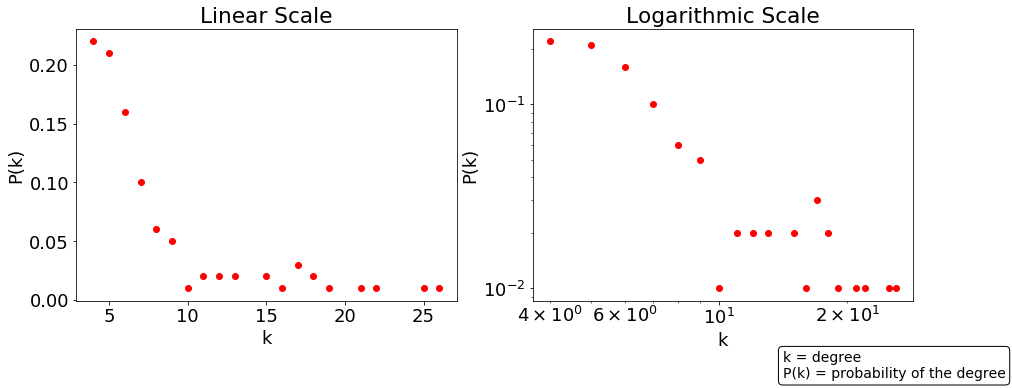

Largest degree of any node in the collaboration network: 26


'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


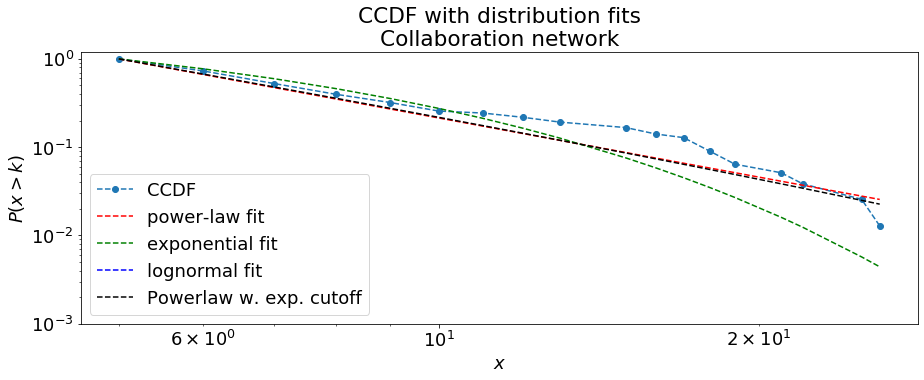

The global clustering coefficient of the network: 0.12439399535792718


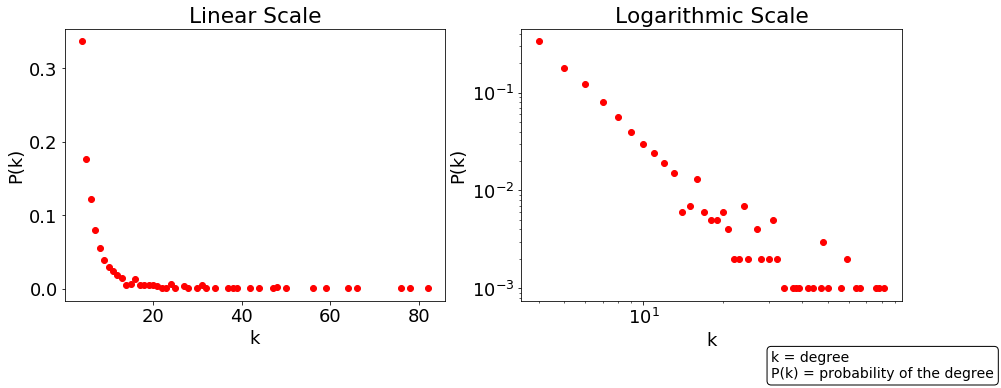

Largest degree of any node in the collaboration network: 82


'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


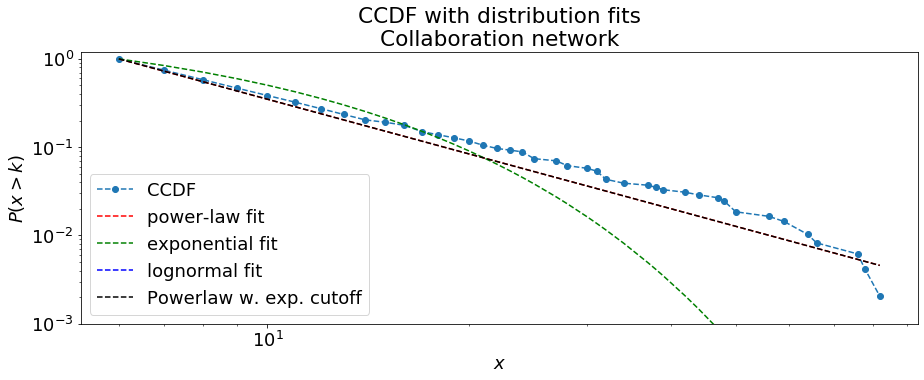

The global clustering coefficient of the network: 0.032346802142607774


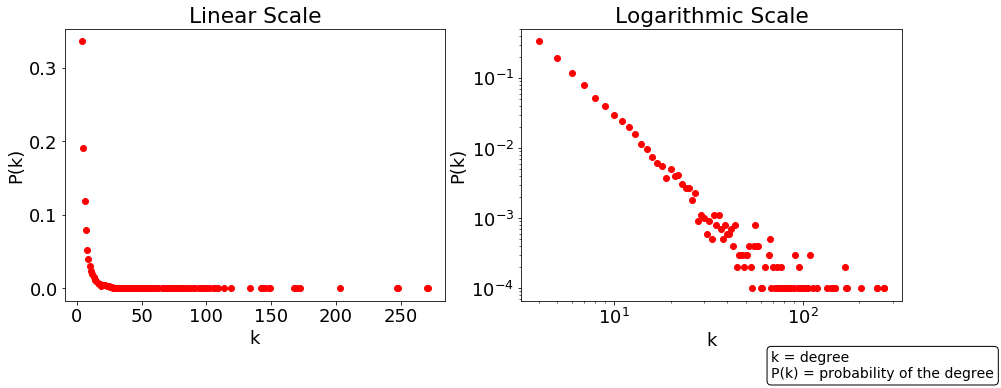

Largest degree of any node in the collaboration network: 271


'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


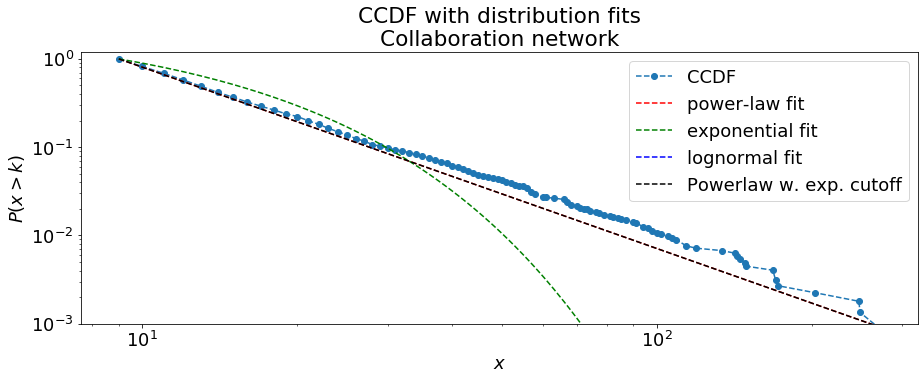

The global clustering coefficient of the network: 0.005555420106851324


In [42]:
G = barabasi_albert_graph(10000,4)

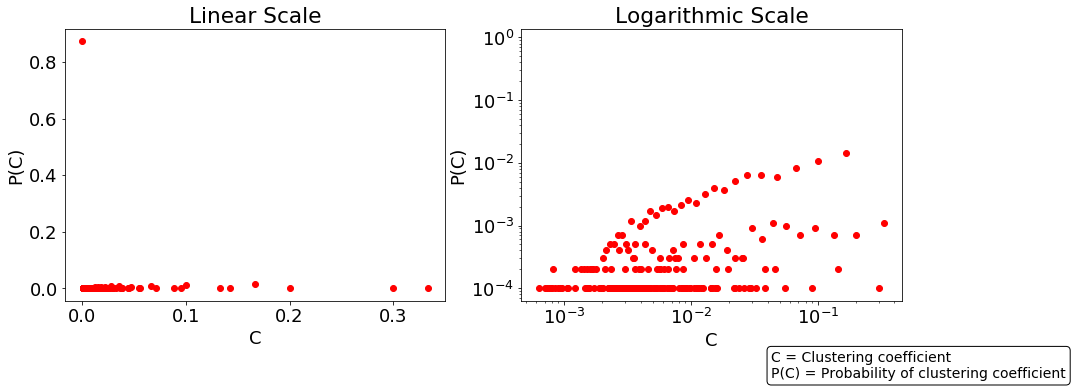

The global clustering coefficient of the network: 0.0063208556920040255


In [40]:
#Clustering coefficient?
nodes_clustering = nx.clustering(G)
clustering_count = Counter(nodes_clustering.values())
plot_counter(clustering_count,xlabel = "C", ylabel = "P(C)" ,has_legend = True,
             xmeaning = ' Clustering coefficient', ymeaning = ' Probability of clustering coefficient')
clustering_coefficient = nx.average_clustering(G)
print("The global clustering coefficient of the network: {}".format(clustering_coefficient))